In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/231205 AI와 기후변화 실습/앙상블 실습'

/content/drive/My Drive/231205 AI와 기후변화 실습/앙상블 실습


In [48]:
# SSP_585 폴더 내 파일명 가져오기
ssp_585_folder = os.listdir('./SSP_585')

# 연월일 저장
Ensemble_ssp = pd.read_csv('./SSP_585' + '/' + ssp_585_folder[0])[['YR', 'MM', 'DD']]

In [49]:
# SSP_585 폴더 내 파일명 가져오기
ssp_585_folder = os.listdir('./SSP_585')

# SSP 파일 컬럼명 저장
cols = ['PCP', 'TMAX', 'TMIN', 'WDSP', 'RLTV_HMDT', 'SLRD']

# 컬럼명을 key로 갖는 딕셔너리 생성
ssp_col_dict = {}
for col in cols:
    # 딕셔너리의 key별로 빈리스트 생성
    ssp_col_dict[col] = []

for file in ssp_585_folder:
    data = pd.read_csv('./SSP_585' + '/' + file)

    # key별 리스트에 해당 컬럼 저장
    for col in cols:
        ssp_col_dict[col].append(data[col])


In [57]:
# max, min, mean, median 값 구하기
for col in cols:
    df_concat = pd.concat(ssp_col_dict[col], axis=1)
    df_concat[f'max_{col}'] = 0
    df_concat[f'min_{col}'] = 0
    df_concat[f'mean_{col}'] = 0
    df_concat[f'median_{col}'] = 0

    df_concat[f'max_{col}'] = df_concat.loc[:, df_concat.columns[:-4]].max(axis=1)
    df_concat[f'min_{col}'] = df_concat.loc[:, df_concat.columns[:-4]].min(axis=1)
    df_concat[f'mean_{col}'] = df_concat.loc[:, df_concat.columns[:-4]].mean(axis=1)
    df_concat[f'median_{col}'] = df_concat.loc[:, df_concat.columns[:-4]].median(axis=1)

    Ensemble_ssp[col] = df_concat[f'mean_{col}'].copy()

In [71]:
Ensemble_ssp['YR'] = [str(x) for x in Ensemble_ssp['YR']]
Ensemble_ssp['MM'] = [str(x).zfill(2) for x in Ensemble_ssp['MM']]
Ensemble_ssp['DD'] = [str(x).zfill(2) for x in Ensemble_ssp['DD']]

Ensemble_ssp['YMD'] = Ensemble_ssp['YR'] + '-' + Ensemble_ssp['MM'] + '-' + Ensemble_ssp['DD']
Ensemble_ssp['YMD'] = pd.to_datetime(Ensemble_ssp['YMD'])

In [84]:
# 범위로 값 표현

df_concat = pd.concat(ssp_col_dict['PCP'], axis=1)

df_concat['max_PCP'] = 0
df_concat['min_PCP'] = 0
df_concat['mean_PCP'] = 0
df_concat['median_PCP'] = 0
df_concat['25_PCP'] = 0
df_concat['75_PCP'] = 0

df_concat['max_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].max(axis=1)
df_concat['min_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].min(axis=1)
df_concat['mean_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].mean(axis=1)
df_concat['median_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].median(axis=1)
df_concat['25_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].quantile(q=0.25, axis=1)
df_concat['75_PCP'] = df_concat.loc[:, df_concat.columns[:-6]].quantile(q=0.75, axis=1)

df_concat['YMD'] = Ensemble_ssp['YMD'].copy()

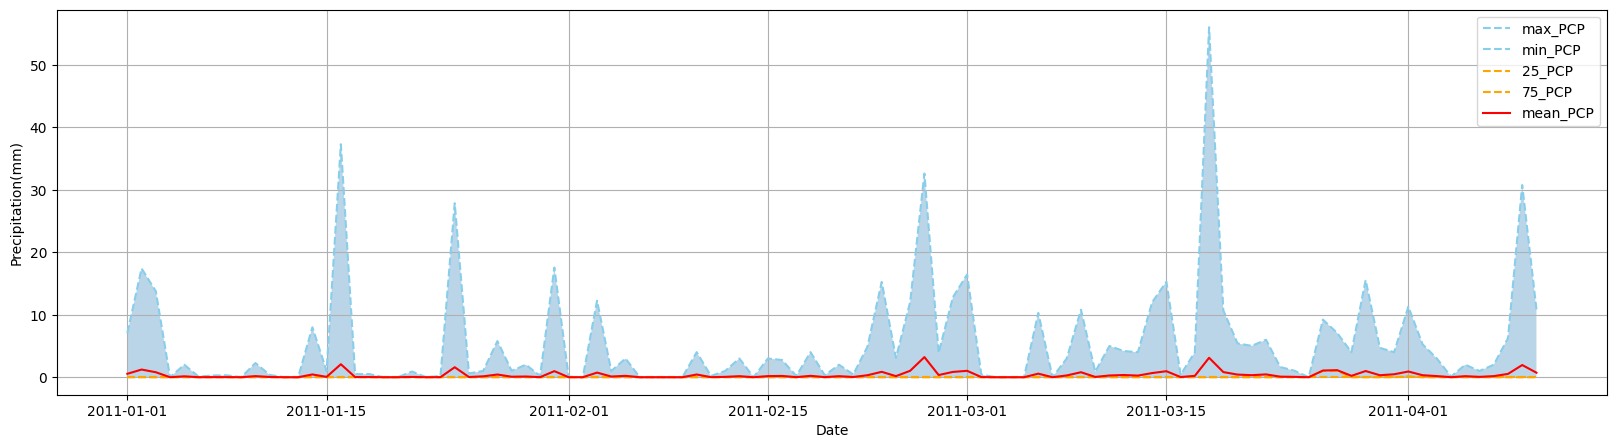

In [88]:
plt.figure(figsize=(20, 5))

length = 100
plt.fill_between(x=df_concat['YMD'][:length], y1=df_concat['min_PCP'][:length], y2=df_concat['max_PCP'][:length], alpha=0.3)
plt.plot(df_concat['YMD'][:length], df_concat['max_PCP'][:length], '--', color='skyblue', label='max_PCP')
plt.plot(df_concat['YMD'][:length], df_concat['min_PCP'][:length], '--', color='skyblue', label='min_PCP')
plt.plot(df_concat['YMD'][:length], df_concat['25_PCP'][:length], '--', color='orange', label='25_PCP')
plt.plot(df_concat['YMD'][:length], df_concat['75_PCP'][:length], '--', color='orange', label='75_PCP')
plt.plot(df_concat['YMD'][:length], df_concat['mean_PCP'][:length], color='red', label='mean_PCP')
plt.ylabel('Precipitation(mm)')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()